### Import libraries and data

In [1]:
# import libraries, packages and modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def fraud(df):
    return df[df.FraudResult == 1]

def no_fraud(df):
    return df[df.FraudResult == 0]

In [3]:
# import data

df = pd.read_csv("data/training.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Transform TransactionTime into Dates and Times

In [4]:
import datetime

# Transform type object to type datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionStartTime'].head()

# Split date and time
df['Date'] = df['TransactionStartTime'].dt.date
df['Time'] = df['TransactionStartTime'].dt.time

# Split Date into year, month, week and day
df['Year'] = df['TransactionStartTime'].dt.year
df['Month'] = df['TransactionStartTime'].dt.month
df['Week'] = df['TransactionStartTime'].dt.isocalendar().week
df['Day'] = df['TransactionStartTime'].dt.day



# 0 = Monday - 6 = Sunday
df['Day_of_week'] = df['TransactionStartTime'].dt.dayofweek

# drop redundant columns
df.drop("Date", axis=1, inplace=True)
df.drop("TransactionStartTime", axis=1, inplace=True)


### Clean up IDs and remove unneccessary columns

In [5]:
df.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,PricingStrategy,FraudResult,Time,Year,Month,Week,Day,Day_of_week
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000.0,1000,2,0,02:18:49,2018,11,46,15,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-20.0,20,2,0,02:19:08,2018,11,46,15,3
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500.0,500,2,0,02:44:21,2018,11,46,15,3


In [6]:
# clean entries

df["TransactionId"]=df.TransactionId.str.split('_').str[-1]
df["BatchId"]=df.BatchId.str.split('_').str[-1]
df["AccountId"]=df.AccountId.str.split('_').str[-1]
df["SubscriptionId"]=df.SubscriptionId.str.split('_').str[-1]
df["CustomerId"]=df.CustomerId.str.split('_').str[-1]
#df["ProviderId"]=df.ProviderId.str.split('_').str[-1]
#df["ProductId"]=df.ProductId.str.split('_').str[-1]
#df["ChannelId"]=df.ChannelId.str.split('_').str[-1]

# add string "PricingStrategy_" to all entries in column "PricingStrategy" (needed later for dummy variables)

df["PricingStrategy"] ='PricingStrategy_' + df["PricingStrategy"].astype(str)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,PricingStrategy,FraudResult,Time,Year,Month,Week,Day,Day_of_week
0,76871,36123,3957,887,4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000.0,1000,PricingStrategy_2,0,02:18:49,2018,11,46,15,3
1,73770,15642,4841,3829,4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-20.0,20,PricingStrategy_2,0,02:19:08,2018,11,46,15,3
2,26203,53941,4229,222,4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500.0,500,PricingStrategy_2,0,02:44:21,2018,11,46,15,3
3,380,102363,648,2185,988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,20000.0,21800,PricingStrategy_2,0,03:32:55,2018,11,46,15,3
4,28195,38780,4841,3829,988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,-644.0,644,PricingStrategy_2,0,03:34:21,2018,11,46,15,3


In [7]:
# drop: CountryCode (single value), CurrencyCode (single value) and Value (unclear difference between Value and Amount)
df.drop("CountryCode", axis=1, inplace=True)
df.drop("CurrencyCode", axis=1, inplace=True)
df.drop("Value", axis=1, inplace=True)

## Feature Engineering
### Binary Column for INcoming or Outgoing Transaction

In [8]:
# create new column SignAmount with the sign of Amount (0 for - and 1 for +)
df["SignAmount"] = df["Amount"].apply(lambda x: 1 if x >= 0 else 0)

# create new column AbsAmount with the absolute of Amount
df.eval("ModAmount = abs(Amount)", inplace=True)

# delete Amount column
df.drop("Amount", axis=1, inplace=True)

In [9]:
df.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,FraudResult,Time,Year,Month,Week,Day,Day_of_week,SignAmount,ModAmount
0,76871,36123,3957,887,4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,PricingStrategy_2,0,02:18:49,2018,11,46,15,3,1,1000.0
1,73770,15642,4841,3829,4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,PricingStrategy_2,0,02:19:08,2018,11,46,15,3,0,20.0
2,26203,53941,4229,222,4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,PricingStrategy_2,0,02:44:21,2018,11,46,15,3,1,500.0


### Dummie variables for categorical columns

In [10]:
# create dummy variable for ProviderId, ProductId, ProductCategory, ChannelId and PricingStrategy
# join the 5 new dataframes with df

df = df.join(pd.get_dummies(df["ProviderId"]))
df = df.join(pd.get_dummies(df["ProductId"]))
df = df.join(pd.get_dummies(df["ProductCategory"]))
df = df.join(pd.get_dummies(df["ChannelId"]))
df = df.join(pd.get_dummies(df["PricingStrategy"]))
 

df.drop(["ProviderId","ProductId","ProductCategory","ChannelId","PricingStrategy"],axis=1,inplace=True)

### BatchSize

In [11]:
df["batch_size"]= df.groupby(["BatchId"]).transform("count")["TransactionId"]
df.drop("BatchId", axis=1, inplace=True)
df.sort_values("batch_size", ascending=False).head(5)


,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Time,Year,Month,Week,Day,...,utility_bill,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size
39218,125577,835,3465,1180,0,16:30:13,2018,12,52,24,...,0,0,0,1,0,0,0,1,0,28
39201,48260,835,3465,1180,0,16:30:12,2018,12,52,24,...,0,0,0,1,0,0,0,1,0,28
39195,112273,835,3465,1180,0,16:30:11,2018,12,52,24,...,0,0,0,1,0,0,0,1,0,28
39196,57904,835,3465,1180,0,16:30:11,2018,12,52,24,...,0,0,0,1,0,0,0,1,0,28
39220,104815,835,3465,1180,0,16:30:13,2018,12,52,24,...,0,0,0,1,0,0,0,1,0,28


<AxesSubplot:xlabel='batch_size', ylabel='Count'>

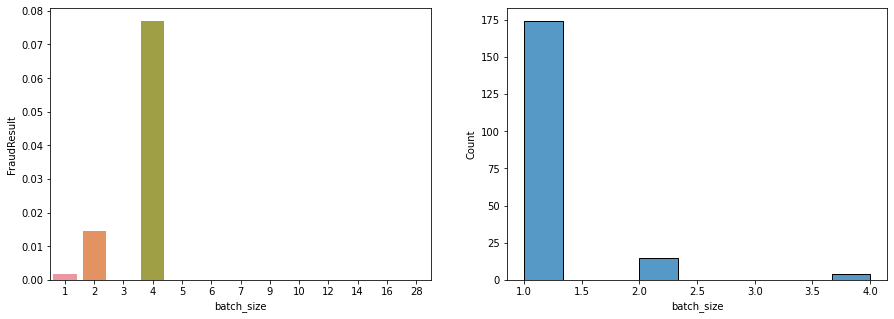

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.barplot(ax= axs[0], data=df.groupby(["batch_size"]).mean().reset_index(), x= "batch_size", y= "FraudResult")
sns.histplot(ax= axs[1], data=fraud(df), x= "batch_size")

Highest fraud percentage in Batch SIze 4  
But Most fraud in single batch  
=> Batch size probably unnecessary

### Total transactions per customer

In [13]:
df["total_transactions_by_customer"] = df.groupby(["CustomerId"]).transform("count")["TransactionId"]
df.sort_values("total_transactions_by_customer", ascending=False).head()

,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Time,Year,Month,Week,Day,...,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer
15025,113825,4249,4429,7343,0,15:30:36,2018,12,49,4,...,0,1,0,0,0,0,0,1,1,4091
52603,47400,4249,4429,7343,0,10:03:30,2019,1,2,8,...,0,1,0,0,0,0,0,1,1,4091
54027,76520,4249,4429,7343,0,11:31:46,2019,1,2,8,...,0,1,0,0,0,0,0,1,1,4091
54026,111360,4249,4429,7343,0,11:31:42,2019,1,2,8,...,0,1,0,0,0,0,0,1,1,4091
54025,118795,4249,4429,7343,0,11:31:38,2019,1,2,8,...,0,1,0,0,0,0,0,1,1,4091


<AxesSubplot:xlabel='total_transactions_by_customer', ylabel='Count'>

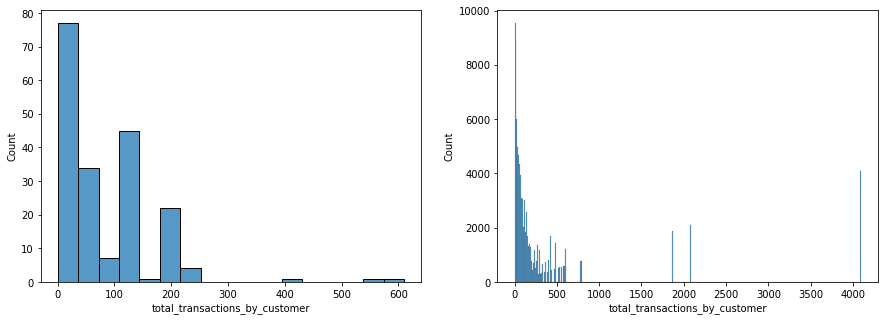

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data=fraud(df), x= "total_transactions_by_customer")
sns.histplot(ax= axs[1], data=no_fraud(df), x= "total_transactions_by_customer")

Most frauds hit customers with lower numbers of transactions
=> But overall more users with low numbers...

### Total transactions in this month by this customer


In [15]:
df["transactions_by_customer_this_month"] = df.groupby(["CustomerId", "Year", "Month"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_month", ascending=False)


,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Time,Year,Month,Week,Day,...,ChannelId_2,ChannelId_3,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month
27707,20382,3206,1372,3634,0,19:38:11,2018,12,50,14,...,0,1,0,0,0,1,0,1,2085,2081
31825,2809,3206,1372,3634,0,14:50:50,2018,12,51,18,...,0,1,0,0,0,1,0,1,2085,2081
38022,98546,4841,3829,3634,0,09:39:53,2018,12,51,23,...,1,0,0,0,0,1,0,1,2085,2081
29838,101324,4841,3829,3634,0,18:01:22,2018,12,50,16,...,1,0,0,0,0,1,0,1,2085,2081
38018,8013,3206,1372,3634,0,09:38:59,2018,12,51,23,...,0,1,0,0,0,1,0,1,2085,2081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69545,126896,1359,1244,1722,0,19:58:11,2019,1,4,23,...,0,1,0,0,0,1,0,1,1,1
48288,129495,4686,4261,5154,0,08:19:09,2019,1,1,1,...,0,1,0,0,0,1,0,1,1,1
41429,107265,241,2574,566,0,18:08:50,2018,12,52,26,...,0,1,0,0,0,1,0,1,1,1
11278,78510,3640,404,4079,0,08:27:55,2018,11,48,30,...,0,1,0,0,0,0,1,1,1,1


### Total transactions in this week by this customer


In [16]:
df["transactions_by_customer_this_week"] = df.groupby(["CustomerId", "Year", "Week"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_week", ascending=False)


,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Time,Year,Month,Week,Day,...,ChannelId_3,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week
16903,121657,4249,4429,7343,0,17:21:59,2018,12,49,4,...,0,0,0,0,0,1,1,4091,2047,2005
15497,52764,4249,4429,7343,0,15:58:33,2018,12,49,4,...,0,0,0,0,0,1,1,4091,2047,2005
15482,64948,4249,4429,7343,0,15:57:44,2018,12,49,4,...,0,0,0,0,0,1,1,4091,2047,2005
15484,83331,4249,4429,7343,0,15:57:48,2018,12,49,4,...,0,0,0,0,0,1,1,4091,2047,2005
15485,127489,4249,4429,7343,0,15:57:52,2018,12,49,4,...,0,0,0,0,0,1,1,4091,2047,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84481,26718,3759,3885,4202,0,17:40:46,2019,2,5,3,...,1,0,0,0,1,0,1,21,4,1
84488,123024,10,4346,680,0,17:45:37,2019,2,5,3,...,0,1,0,0,0,1,1,13,2,1
51800,61778,2625,2370,3043,0,17:32:36,2019,1,1,6,...,1,0,0,0,1,0,1,13,1,1
9316,98916,4249,4429,7447,0,14:43:23,2018,11,48,27,...,0,0,0,0,0,1,1,4,1,1


### Total transactions on this day by this customer

In [17]:
df["transactions_by_customer_this_day"] = df.groupby(["CustomerId", "Year", "Month", "Day"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_day", ascending=False)

,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Time,Year,Month,Week,Day,...,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day
53496,116788,4249,4429,7343,0,10:58:21,2019,1,2,8,...,0,0,0,0,1,1,4091,2016,2000,1999
54293,130101,4249,4429,7343,0,11:48:31,2019,1,2,8,...,0,0,0,0,1,1,4091,2016,2000,1999
54286,95044,4249,4429,7343,0,11:48:03,2019,1,2,8,...,0,0,0,0,1,1,4091,2016,2000,1999
54287,107930,4249,4429,7343,0,11:48:07,2019,1,2,8,...,0,0,0,0,1,1,4091,2016,2000,1999
54288,21198,4249,4429,7343,0,11:48:11,2019,1,2,8,...,0,0,0,0,1,1,4091,2016,2000,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90739,39441,1928,2980,2322,0,17:31:02,2019,2,6,8,...,0,0,0,1,0,1,5,5,5,1
71028,120760,2811,393,3233,0,07:09:30,2019,1,4,25,...,0,0,0,1,0,1,141,35,8,1
84698,138764,638,4491,977,0,04:53:06,2019,2,6,4,...,0,0,0,1,0,1,60,3,1,1
17230,117663,3230,970,3658,0,07:40:50,2018,12,49,5,...,0,0,0,1,0,1,47,43,24,1


<AxesSubplot:xlabel='transactions_by_customer_this_month', ylabel='Count'>

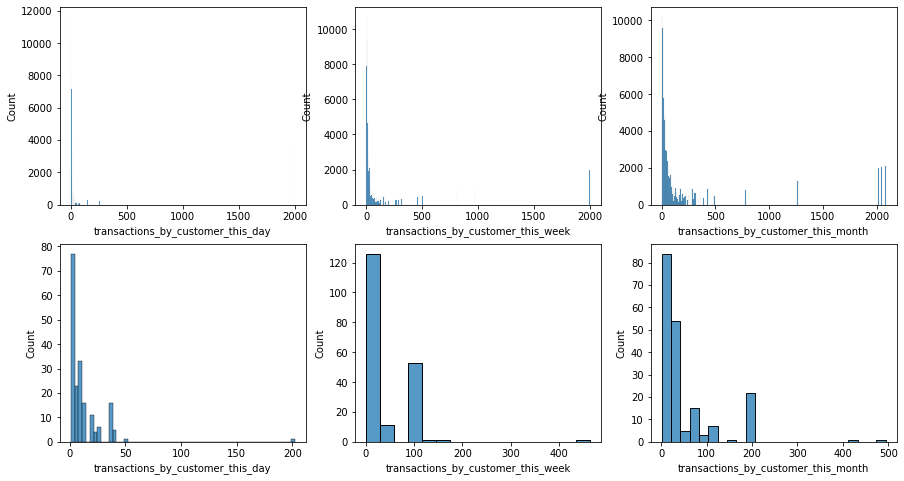

In [18]:
fig, axs = plt.subplots(2,3, figsize=(15, 8), sharey=False)
sns.histplot(ax= axs[0,0], data= no_fraud(df), x="transactions_by_customer_this_day")
sns.histplot(ax= axs[0,1], data= no_fraud(df), x="transactions_by_customer_this_week")
sns.histplot(ax= axs[0,2], data= no_fraud(df), x="transactions_by_customer_this_month")
sns.histplot(ax= axs[1,0], data= fraud(df), x="transactions_by_customer_this_day")
sns.histplot(ax= axs[1,1], data= fraud(df), x="transactions_by_customer_this_week")
sns.histplot(ax= axs[1,2], data= fraud(df), x="transactions_by_customer_this_month")

<AxesSubplot:xlabel='FraudResult', ylabel='transactions_by_customer_this_month'>

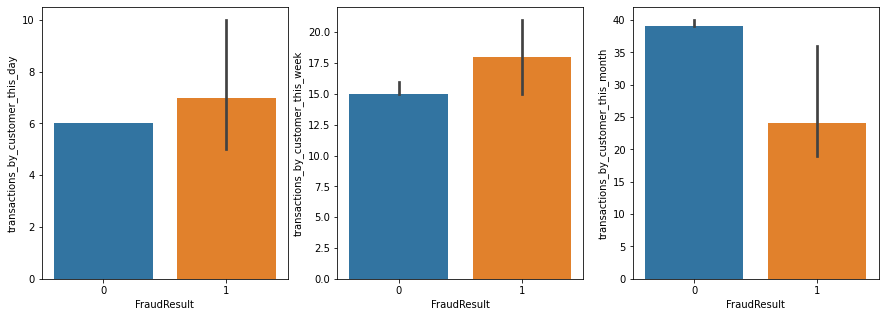

In [19]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), sharey=False)
sns.barplot(ax= axs[0], data= df, x= "FraudResult", y="transactions_by_customer_this_day", estimator=np.median)
sns.barplot(ax= axs[1], data= df, x= "FraudResult", y="transactions_by_customer_this_week", estimator=np.median)
sns.barplot(ax= axs[2], data= df, x= "FraudResult", y="transactions_by_customer_this_month", estimator=np.median)

### Unusual amounts of transaction in current timeframe?

In [20]:
df["day_vs_week"] = df["transactions_by_customer_this_day"] / df["transactions_by_customer_this_week"]
df["day_vs_month"] = df["transactions_by_customer_this_day"] / df["transactions_by_customer_this_month"]
df["week_vs_month"] = df["transactions_by_customer_this_week"] / df["transactions_by_customer_this_month"]

<AxesSubplot:xlabel='FraudResult', ylabel='week_vs_month'>

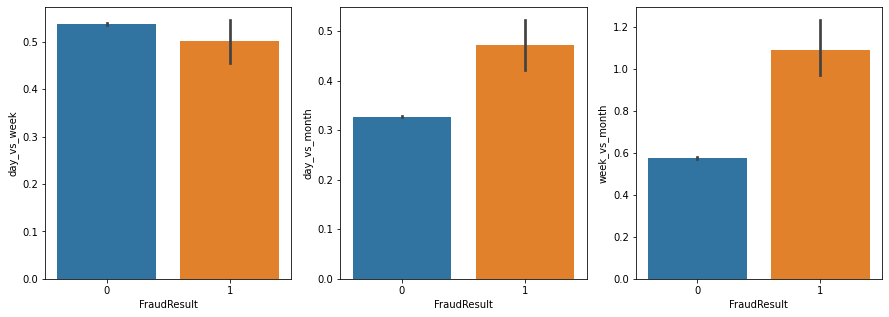

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), sharey=False)
sns.barplot(ax= axs[0], data= df, x= "FraudResult", y="day_vs_week")
sns.barplot(ax= axs[1], data= df, x= "FraudResult", y="day_vs_month")
sns.barplot(ax= axs[2], data= df, x= "FraudResult", y="week_vs_month")

large percentage of monthly transactions made on single day => more likely to be fraud  
large percentage of monthly transactions made this week => more likely to be fraud

<AxesSubplot:xlabel='day_vs_week', ylabel='Count'>

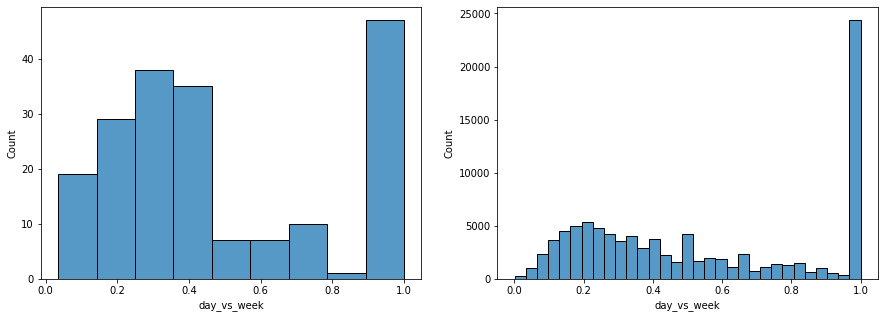

In [22]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data= fraud(df), x="day_vs_week")
sns.histplot(ax= axs[1], data= no_fraud(df), x="day_vs_week")

<AxesSubplot:xlabel='day_vs_month', ylabel='Count'>

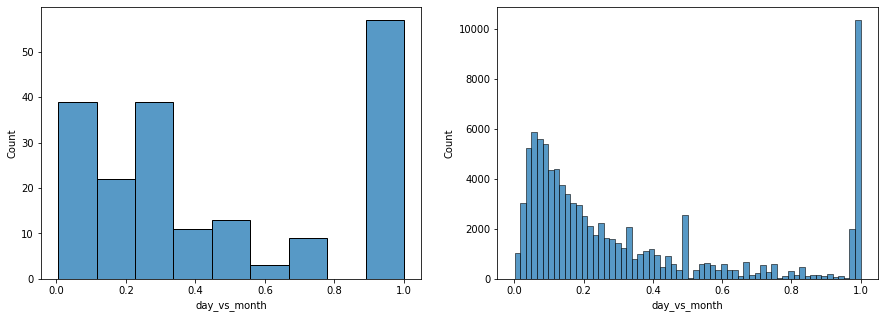

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data= fraud(df), x="day_vs_month")
sns.histplot(ax= axs[1], data= no_fraud(df), x="day_vs_month")

<AxesSubplot:xlabel='week_vs_month', ylabel='Count'>

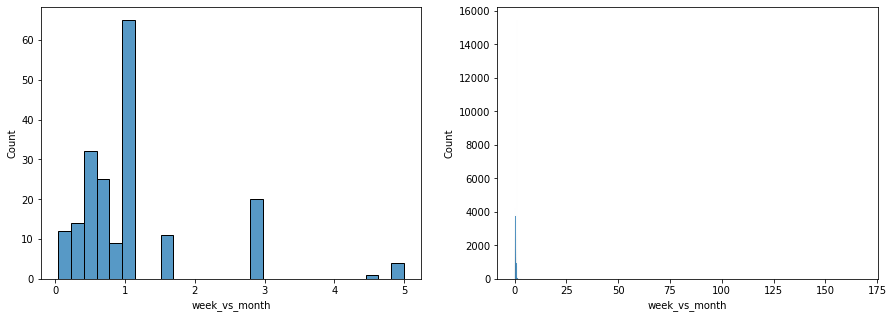

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data= fraud(df), x="week_vs_month")
sns.histplot(ax= axs[1], data= no_fraud(df), x="week_vs_month")